In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    '/kaggle/input/data-mal/data/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    '/kaggle/input/data-mal/data/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    '/kaggle/input/data-mal/data/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 2288 images belonging to 2 classes.
Found 762 images belonging to 2 classes.
Found 763 images belonging to 2 classes.


In [3]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for your task
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
#     layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.000100)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(
    train_data,
    epochs=50,
    validation_data=val_data
) 

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1743773616.928556     126 service.cc:145] XLA service 0x7b498c00fdf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743773616.928619     126 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1743773616.928623     126 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/72 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.3438 - loss: 1.1623  

I0000 00:00:1743773622.911518     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 324ms/step - accuracy: 0.7141 - loss: 0.8729 - val_accuracy: 0.7861 - val_loss: 0.3923
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.7819 - loss: 0.4937 - val_accuracy: 0.7861 - val_loss: 0.4719
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.7813 - loss: 0.4745 - val_accuracy: 0.7861 - val_loss: 0.6178
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.7846 - loss: 0.4684 - val_accuracy: 0.7861 - val_loss: 0.4025
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.8022 - loss: 0.4235 - val_accuracy: 0.7861 - val_loss: 0.4429
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - accuracy: 0.8066 - loss: 0.4328 - val_accuracy: 0.7861 - val_loss: 0.4338
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - accuracy: 0.8152 - loss: 0.3790 - val_accuracy: 0.7861 - val_loss: 0.4916
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.7980 - loss: 0.4271 - val_accuracy: 0.8176 - val

In [6]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.9667 - loss: 0.1075
Test Accuracy: 97.25%


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Get the ground truth labels and model predictions
y_true = test_data.classes
y_pred = np.round(model.predict(test_data))

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step
Precision: 0.1538
Recall: 0.1472
F1 Score: 0.1505


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step


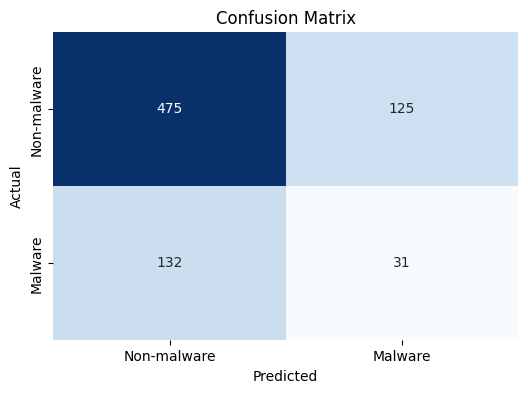

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the ground truth labels and model predictions
y_true = test_data.classes
y_pred = np.round(model.predict(test_data))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-malware', 'Malware'], 
            yticklabels=['Non-malware', 'Malware'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
